<a href="https://colab.research.google.com/github/xRipzch/ResNesVegReg/blob/main/ResNet_Veg_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import itertools

In [ ]:
!git clone "https://github.com/joneikholmkea/veggies"

Cloning into 'veggies'...
remote: Enumerating objects: 21077, done.
remote: Total 21077 (delta 0), reused 0 (delta 0), pack-reused 21077 (from 1)
Receiving objects: 100% (21077/21077), 530.68 MiB | 29.45 MiB/s, done.
Resolving deltas: 100% (107/107), done.
Updating files: 100% (30010/30010), done.


In [ ]:
trainingFiles = "/content/veggies/trainRed"
testFiles = "/content/veggies/testRed"

In [ ]:
imageFiles = glob(trainingFiles + '/*/*.jp*g')
folders = glob(trainingFiles + "/*")
folders

['/content/veggies/trainRed/Potato',
 '/content/veggies/trainRed/Pumpkin',
 '/content/veggies/trainRed/Cauliflower',
 '/content/veggies/trainRed/Tomato',
 '/content/veggies/trainRed/Bitter_Gourd',
 '/content/veggies/trainRed/Radish',
 '/content/veggies/trainRed/Capsicum',
 '/content/veggies/trainRed/Brinjal',
 '/content/veggies/trainRed/Bean',
 '/content/veggies/trainRed/Cucumber',
 '/content/veggies/trainRed/Papaya',
 '/content/veggies/trainRed/Broccoli',
 '/content/veggies/trainRed/Bottle_Gourd',
 '/content/veggies/trainRed/Carrot',
 '/content/veggies/trainRed/Cabbage']

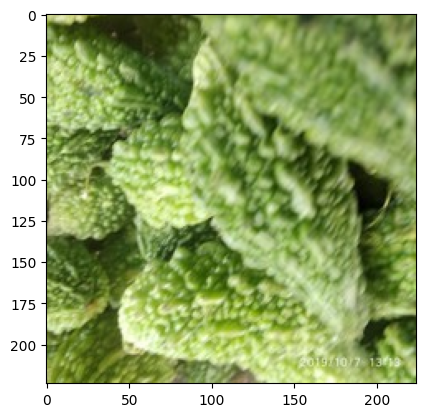

In [ ]:
plt.imshow(image.load_img(np.random.choice(imageFiles)))

In [ ]:
resNet = ResNet50(input_shape= [100, 100] + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in resNet.layers:  #we do not want to train previous layers in the model.
  layer.trainable = False

In [ ]:
layers = Flatten()(resNet.output)
layers  = Dense(128, activation = "relu") ( layers)
layers = Dropout(0.2) (layers)
layers = Dense(64, activation = "relu") (layers)
layers = Dense(len(folders), activation="softmax") (layers)


In [ ]:
model = Model(inputs=resNet.input, outputs=layers)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 106, 106, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 50, 50, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 50, 50, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 50, 50, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 52, 52, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 25, 25, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 25, 25, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 25, 25, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 25, 25, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 25, 25, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 25, 25, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 25, 25, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 25, 25, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 25, 25, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 27,791,375 (106.02 MB)

 Trainable params: 4,203,663 (16.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
dataGen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

In [ ]:
dataGenTest = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
training_set=dataGen.flow_from_directory(trainingFiles, target_size=(100,100), batch_size=48, class_mode="sparse")

Found 3000 images belonging to 15 classes.


In [ ]:
test_set=dataGenTest.flow_from_directory(testFiles, target_size=(100,100), batch_size=48, class_mode="sparse")

Found 3000 images belonging to 15 classes.


In [ ]:
model.fit(training_set, epochs=2

          , validation_data=test_set)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 293s 4s/step - accuracy: 0.4774 - loss: 2.6192 - val_accuracy: 0.8873 - val_loss: 0.4424
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.8151 - loss: 0.6603 - val_accuracy: 0.8997 - val_loss: 0.3667


In [ ]:
model.evaluate(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8955 - loss: 0.3666


[0.366670697927475, 0.8996666669845581]

In [ ]:
model.save("veggies.keras")